# Demonstration of `logspaced_edges()` function

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import hybrid_jp as hj

In [2]:
def logspaced_edges(arr: hj.arrfloat | hj.arrint) -> hj.arrfloat:
    """Expand a (possibly uneven but approximately) logarithmically spaced arr to edges.

    `arr` is shape (N,), therefore the returned array is shape (N+1,). The end points
    are given by n_0 - (n_1 - n_0)/2 and n_N + (n_N - n_{N-1})/2 for an array
    (n_0...n_N) = log10(arr). The spacing between values of the array is preserved, this
    is useful in the case of integer logspaced arrays where diff(log10(arr)) is not
    constant do to integer rounding. So, each value in the new array is half of the
    separation between the original values.

    Args:
        arr (hj.arrfloat | hj.arrint): Array of values.

    Returns:
        hj.arrfloat: Array of edges.

    Example:
        >>> import matplotlib.pyplot as plt
        >>> import numpy as np
        >>> arr = np.unique(np.logspace(0, 2, 15, dtype=np.int32))
        >>> brr = logspaced_edges(arr)
        >>> fig, axs = plt.subplots(2, 1, figsize=(8, 2))
        >>> axlin, axlog = axs
        >>> orig = axlin.scatter(arr, np.zeros_like(arr), marker="x", color="k")
        >>> new = axlin.scatter(brr, np.zeros_like(brr), marker="+", color="r")
        >>> orig = axlog.scatter(arr, np.zeros_like(arr), marker="x", color="k")
        >>> new = axlog.scatter(brr, np.zeros_like(brr), marker="+", color="r")
        >>> axlog.set_xscale("log")
        >>> axlin.set_title("Linear scale")
        >>> axlog.set_title("Log scale")
        >>> axlin.set_yticks([])
        >>> axlog.set_yticks([])
        >>> axlog.set_xlabel("'x' = original, '+' = bin edges")
        >>> fig.tight_layout()
        >>> plt.show()
    """
    log_arr = np.log10(arr)  # log scale array
    log_diff = np.diff(log_arr)  # log difference

    # Add points on either side of log scaled array, equidistant
    # Original:     +....+....+..+....+....+..+....+....+
    # New:     +....+....+....+..+....+....+..+....+....+....+
    log_wide = np.asarray(
        [log_arr[0] - log_diff[0]] + log_arr.tolist() + [log_arr[-1] + log_diff[-1]]
    )
    log_wiff = np.diff(log_wide)  # Difference of longer array

    # Half of total difference between point i and i+2
    #        +....+....+....+..+....+....+..+....+....+....+
    # Diff:    4    4    4   2   4    4   2   4    4    4
    # Offset        4    4   4   2    4   4   2    4    4     4
    # 1/2 diff:     4    4   3   3    4   3   3    8    8
    log_diff = (log_wiff[:-1] + log_wiff[1:]) / 2

    # First point in new arr is half way between first two points in wide arr or
    # equivalently half of the difference between first and second points in original
    # arr behind the first point.
    first_point = (log_wide[0] + log_wide[1]) / 2
    lags_wide = np.ones(log_arr.size + 1) * first_point

    # Successive points created by adding the cumulative distance of that point from the
    # first point
    lags_wide[1:] = lags_wide[1:] + np.cumsum(log_diff)
    lags_wide = 10 ** (lags_wide)  # Rescale out of log space
    return lags_wide



Create an array of approximately log-spaced data, approximately because each value is
rounded to the nearest integer.

`brr` is the array of bin edges, generated from the array `arr` of bin centres.

In [3]:

arr = np.unique(np.logspace(0, 2, 15, dtype=np.int32))
brr = logspaced_edges(arr)

Plot the data on a `number line`.

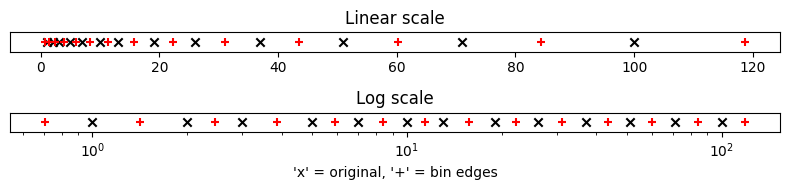

In [7]:

axs: list[plt.Axes]
fig, axs = plt.subplots(2, 1, figsize=(8, 2))  # type: ignore
axlin, axlog = axs
orig = axlin.scatter(arr, np.zeros_like(arr), marker="x", color="k")  # type: ignore
new = axlin.scatter(brr, np.zeros_like(brr), marker="+", color="r")  # type: ignore
orig = axlog.scatter(arr, np.zeros_like(arr), marker="x", color="k")  # type: ignore
new = axlog.scatter(brr, np.zeros_like(brr), marker="+", color="r")  # type: ignore
axlog.set_xscale("log")
axlin.set_title("Linear scale")
axlog.set_title("Log scale")
axlin.set_yticks([])
axlog.set_yticks([])
axlog.set_xlabel("'x' = original, '+' = bin edges")
fig.tight_layout()